In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 10)

In [4]:
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()

In [5]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,...,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,...,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,...,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,...,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,...,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,...,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,...,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,...,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,...,0.86810,0.9387,0.2650,0.4087,0.12400


Целевая переменная из себя представляет бинарный признак:   
- 212 нулей - это класс злокачественной опухоли (Malignant).   
- А 357 единиц - класс доброкачественной опухоли (Benign).

In [6]:
y.value_counts()

1    357
0    212
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split


np.random.seed(5)
features = np.random.randint(X.shape[1], size=2)


X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, features], y, test_size=9, random_state=4)

In [8]:
X_test

,mean area,smoothness error
340,641.2,0.004577
382,447.8,0.005042
300,1217.0,0.006056
262,947.8,0.006717
363,838.1,0.007257
157,880.2,0.003443
120,403.3,0.006040
139,384.8,0.011270
99,642.5,0.008005


In [9]:
y_test

340    1
382    1
300    0
262    0
363    1
157    1
120    1
139    1
99     0
dtype: int64

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_leaf=5)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [11]:
tree.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 1])

In [15]:
pred_proba = tree.predict_proba(X_test)
pred_proba

array([[0.1509434 , 0.8490566 ],
       [0.03125   , 0.96875   ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.03370787, 0.96629213],
       [0.45454545, 0.54545455]])

И теперь стоит поговорить про расчет метрики ROC-AUC. Чтобы её получить нужно оперировать двумя метриками, которые строятся на матрице ошибок - это TPR и FPR.


**TPR (True Positive Rate, доля верных срабатываний)** - отношение числа верных срабатываний к размеру положительного класса:

$$TPR = \frac{TP}{TP+FN}$$

то есть TPR по сути представляет из себя полноту - сколько раз модель правильно нашла целевой класс среди тех людей, которые действительно являются им.

Данная метрика в идеале должна стремиться к единице.


**FPR (False Positive Rate, доля ложных срабатываний)** - отношение числа ложных срабатываний к общему размеру отрицательного класса:
$$FPR = \frac{FP}{FP+TN}$$

а здесь имеем некий аналог полноты только для ошибок - сколько раз модель ошибочно нашла целевой класс среди всех людей нецелевого класса.

Данная метрика в идеале должна стремиться к нулю.


Давайте посчитаем TPR и FPR. Возьмем значения из матрицы ошибок и подставим их в формулы.

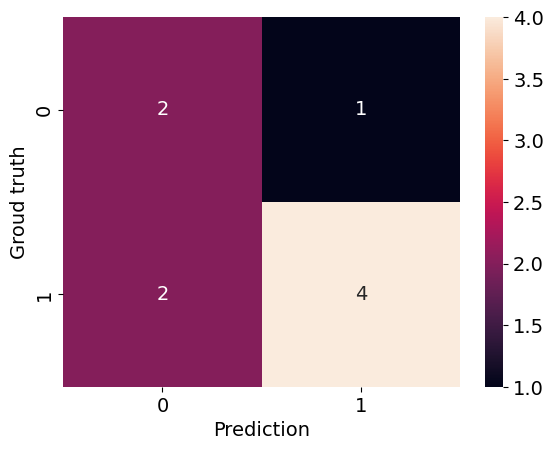

In [18]:
from sklearn.metrics import confusion_matrix

threshold = 0.5
pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

In [19]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

In [20]:
print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.6666666666666666
FPR 0.3333333333333333


Поднимем отсечку до 0,6

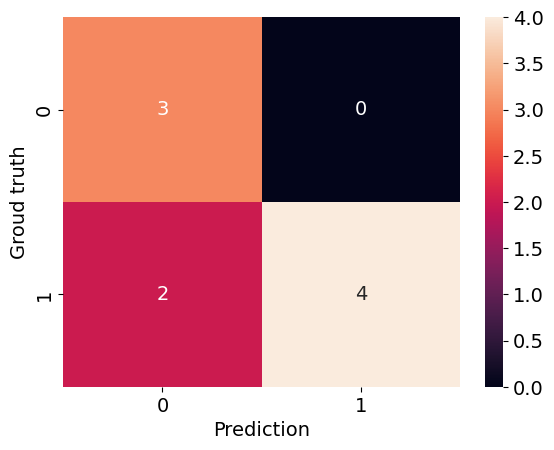

In [21]:
from sklearn.metrics import confusion_matrix

threshold = 0.6
pred = np.where(pred_proba[:, 1] >= threshold, 1, 0)

cm = confusion_matrix(y_test, pred)
f = sns.heatmap(cm, annot=True)
plt.ylabel('Groud truth')
plt.xlabel('Prediction');

In [22]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

print('TPR', TP / (TP + FN))
print('FPR', FP / (FP + TN))

TPR 0.6666666666666666
FPR 0.0


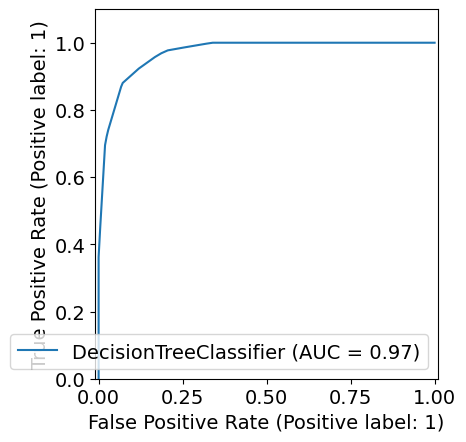

In [26]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(tree, X_train, y_train)

plt.ylim([0, 1.1])
plt.show();

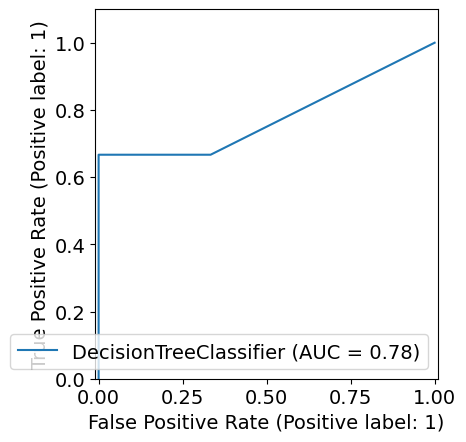

In [27]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(tree, X_test, y_test)

plt.ylim([0, 1.1])
plt.show();

In [28]:
tree.score(X_test, y_test)

0.6666666666666666

In [37]:
from sklearn.metrics import roc_curve, auc

fprs, tprs, thr = roc_curve(y_test, pred_proba[:, 1])

In [38]:
fprs

array([0.        , 0.        , 0.        , 0.33333333, 1.        ])

In [39]:
tprs

array([0.        , 0.16666667, 0.66666667, 0.66666667, 1.        ])

Text(0.5, 1.0, 'ROC_curve')

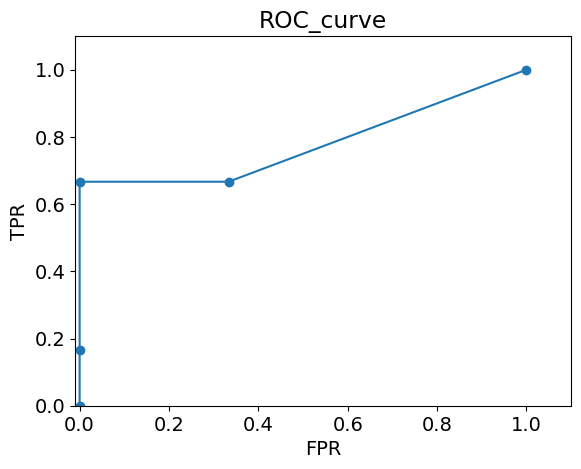

In [42]:
plt.plot(fprs, tprs, marker='o')
plt.ylim([0, 1.1]); plt.xlim([-0.01, 1.1])
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.title('ROC_curve')

In [41]:
auc(fprs, tprs)

0.7777777777777778